###Keras ML基础-基本图像分类

#### 基本分类：对服装图像进行分类

本指南训练了一个神经网络模型来对衣服的图像进行分类，例如运动鞋和衬衫。

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# 安装 TensorFlow
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


### 导入Fashion MNIST数据集
本指南使用[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)数据集，其中包含10个类别的70,000个灰度图像。图像显示了低分辨率（28 x 28像素）的单个衣​​物，如下所示：
![Fashion MNIST](https://tensorflow.org/images/fashion-mnist-sprite.png)

直接从TensorFlow导入和加载Fashion MNIST数据：

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


直接从TensorFlow导入和加载Fashion MNIST数据：

每个图像都映射到一个标签。由于类名不包含在数据集中，因此将它们存储在此处以供以后在绘制图像时使用：

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###探索数据
在训练模型之前，让我们探索数据集的格式。下图显示了训练集中有60,000张图像，每张图像表示为28 x 28像素：

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

###预处理数据
在训练网络之前，必须对数据进行预处理。如果检查训练集中的第一张图像，您将看到像素值落在0到255的范围内：

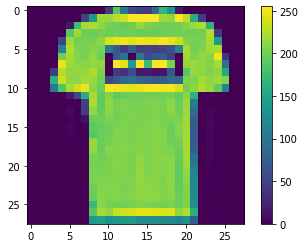

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

将这些值缩放到0到1的范围，然后再将其输入神经网络模型。为此，将值除以255。以相同的方式预处理训练集和测试集非常重要：

In [0]:
train_images, test_images = train_images / 255.0, test_images / 255.0

为了验证数据的格式正确，并准备好构建和训练网络，让我们显示训练集中的前25张图像，并在每个图像下方显示类别名称。

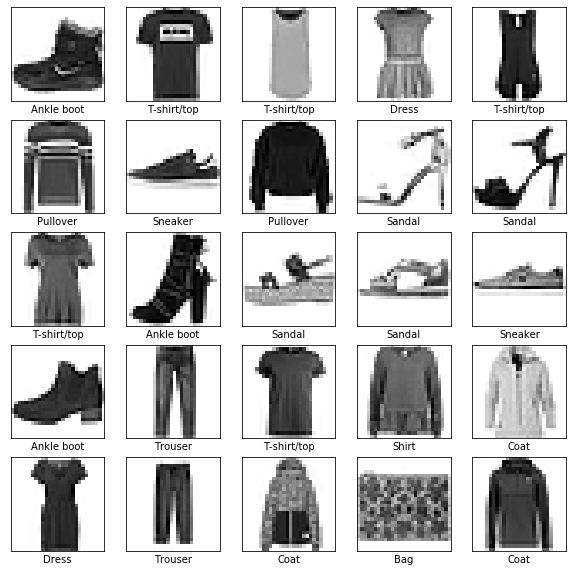

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

###建立模型
建立神经网络需要配置模型的各层，然后编译模型。

###设置图层
神经网络的基本组成部分是层。图层从输入到其中的数据中提取表示。希望这些表示对于当前的问题有意义。

深度学习的大部分内容是将简单的层链接在一起。大多数层（例如tf.keras.layers.Dense）具有在训练期间学习的参数。

In [0]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10,activation='softmax')
])

该网络的第一层tf.keras.layers.Flatten将图像格式从二维数组（28 x 28像素）转换为一维数组（28 * 28 = 784像素）。可以将这一层看作是堆叠图像中的像素行并对齐它们。该层没有学习参数。它只会重新格式化数据。

像素变平后，网络由tf.keras.layers.Dense两层序列组成。这些是紧密连接或完全连接的神经层。第一Dense层有128个节点（或神经元）。第二层（也是最后一层）是一个10节点的softmax层，该层返回10个总和为1的概率得分的数组。每个节点都包含一个得分，该得分指示当前图像属于10个类别之一的概率。

### 编译模型
在准备训练模型之前，需要进行一些其他设置。这些是在模型的编译步骤中添加的：

* 损失函数 -衡量训练期间模型的准确性。您希望最小化此功能，以在正确的方向上“引导”模型。
* 优化器 -这是基于模型看到的数据及其损失函数来更新模型的方式。
* 指标 -用于监视培训和测试步骤。以下示例使用precision，即正确分类的图像比例。

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

###训练模型
训练神经网络模型需要执行以下步骤：

1. 将训练数据输入模型。在此示例中，训练数据在train_images和train_labels数组中。
2. 该模型学习关联图像和标签。
3. 您要求模型对测试集（在此示例中为test_images数组）做出预测。
4. 验证预测是否与test_labels阵列中的标签匹配。

###喂模型
要开始训练，请调用该model.fit方法，之所以这么称呼是因为该方法使模型“适合”训练数据：

In [14]:
history = model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2297 - accuracy: 0.9136
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2229 - accuracy: 0.9162
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2150 - accuracy: 0.9196
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2092 - accuracy: 0.9207
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2022 - accuracy: 0.9227
Epoch 6/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1968 - accuracy: 0.9263
Epoch 7/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1900 - accuracy: 0.9283
Epoch 8/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1855 - accuracy: 0.9299
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.1822 - accuracy: 0.9319
Epoch 10/10
60

模型训练时，会显示损失和准确性指标。该模型在训练数据上达到约0.934（或93.4％）的精度。

评估准确性
接下来，比较模型在测试数据集上的表现：

In [17]:
history.history

{'accuracy': [0.91361666,
  0.9162167,
  0.91955,
  0.92071664,
  0.9227333,
  0.9263167,
  0.92826664,
  0.9298667,
  0.93185,
  0.9339833],
 'loss': [0.22974402211308478,
  0.22286303151994943,
  0.21504744953016441,
  0.20915423974891503,
  0.20217713716278474,
  0.19681475240985552,
  0.18998970112800598,
  0.18550416637559733,
  0.18224538574963808,
  0.17735034889231124]}

In [18]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print('Test accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3704 - accuracy: 0.8867
Test accuracy: 0.8867


事实证明，测试数据集的准确性略低于训练数据集的准确性。训练准确性和测试准确性之间的差距代表过度拟合。过度拟合是指机器学习模型在新的，以前看不见的输入上的表现比训练数据上的表现差的情况。

###作出预测
通过训练模型，您可以使用它来预测某些图像。

In [0]:
predictions = model.predict(test_images)

在这里，模型已经预测了测试集中每个图像的标签。让我们看一下第一个预测：

In [20]:
predictions[0]

array([2.1475961e-10, 4.5435327e-13, 1.5557770e-13, 6.9658065e-14,
       1.7920271e-10, 3.6311076e-06, 7.6047497e-09, 2.1052299e-02,
       1.1019784e-10, 9.7894406e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

因此，模型最有信心该图像是踝靴或class_names[9]。检查测试标签表明此分类是正确的：

In [22]:
test_labels[0]

9

以图形方式查看完整的10个类预测。

In [0]:
def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img = predictions_array,true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

###验证预测
通过训练模型，您可以使用它来预测某些图像。

让我们看一下第0张图片，预测和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。该数字给出了预测标签的百分比（满分为100）。

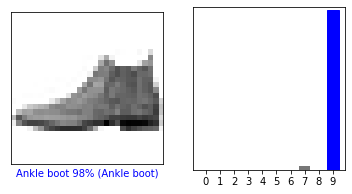

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

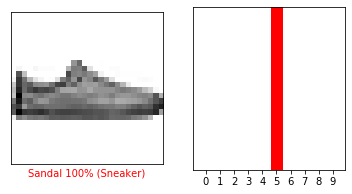

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

让我们绘制一些带有预测的图像。请注意，即使非常自信，该模型也可能是错误的。

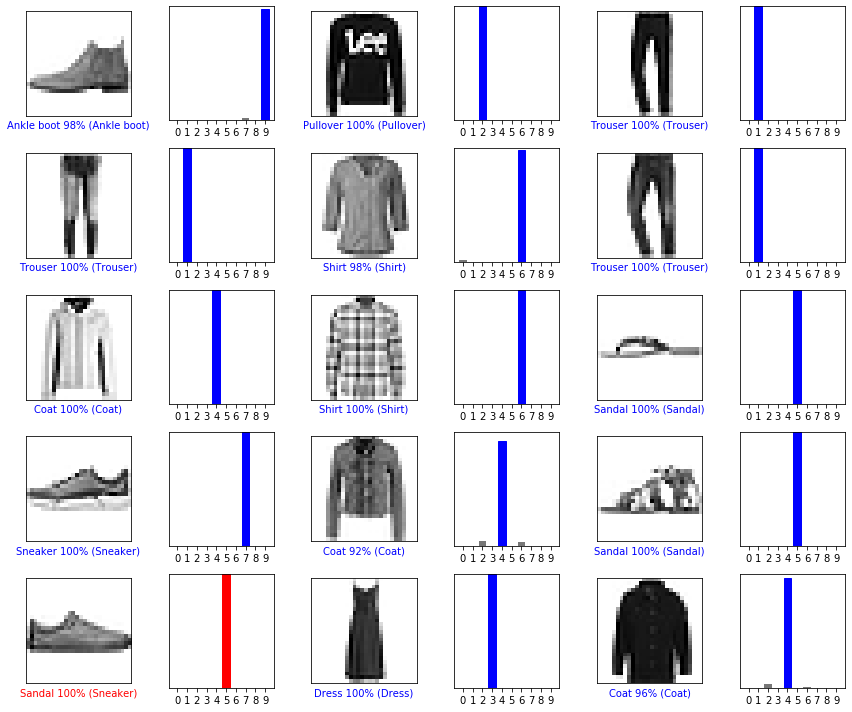

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()


###使用训练有素的模型
最后，使用经过训练的模型对单个图像进行预测。

In [35]:
img = test_images[i]
print(img.shape)

(28, 28)


tf.keras对模型进行了优化，可以一次对一批或一组示例进行预测。因此，即使您使用的是单个图像，也需要将其添加到列表中：

In [36]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


现在，为该图像预测正确的标签：

In [37]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.1380891e-05 1.2747352e-09 3.2106046e-02 1.8875266e-05 9.6476847e-01
  1.8295094e-16 2.9057134e-03 6.4545876e-14 1.8956162e-04 3.1417560e-11]]


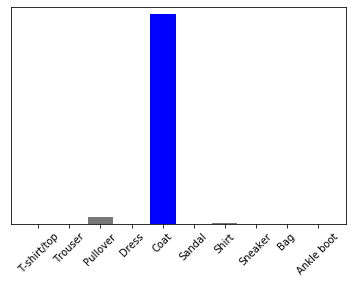

In [39]:
plot_value_array(i,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names, rotation=45)

model.predict返回列表列表-数据批次中每个图像的一个列表。批量获取我们（唯一）图像的预测：

In [40]:
np.argmax(predictions_single[0])

4

该模型将按预期预测标签。